In [1]:
import numpy as np
import matplotlib.pyplot as plt

from unit_tests.Classification import \
    sigmoid_test, compute_cost_test, compute_gradient_test, predict_test

# 1. Dataset
- Predict the chance of admission

| Exam 1 score (float) | Exam 2 score (float) | Admitted (bool) |
|----------------------|----------------------|-----------------|
| $x_1^{(i)}$                | $x_2^{(i)}$                | $y^{(i)}$             |

In [2]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [3]:
X_train, y_train = load_data("datasets/ex2data1.txt")

print(f'{X_train.shape = }')
print(f'{X_train.shape = }')
print()
print(f'{X_train[:5] = }')
print(f'{y_train[:5] = }')

X_train.shape = (100, 2)
X_train.shape = (100, 2)

X_train[:5] = array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])
y_train[:5] = array([0., 0., 0., 1., 1.])


#### View

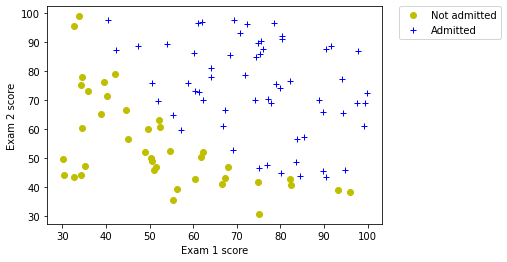

In [4]:
def plot_data(X, y, neg_label="y=0", pos_label="y=1"):
    negative = y == 0
    positive = y == 1
    
    # Plot examples
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    plt.plot(X[positive, 0], X[positive, 1], 'b+', label=pos_label)

    plt.ylabel('Exam 2 score') 
    plt.xlabel('Exam 1 score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plot_data(X_train, y_train[:], neg_label="Not admitted", pos_label="Admitted")
plt.show()

# 2. Model

#### Notation

$$x_j^{(i)}$$
+ $(i)$: data point i-th (m data points)
+ $j$: feature j-th (n features)

#### Sigmoid function
+ Output range: [0,1]
+ Binary classification: 
    + If output $\geq 0.5$: class 1
    + If output $< 0.5$: class 0

$$g(z) = \frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): input size (m,)

    Returns:
        g (ndarray): sigmoid(z), size (m,)
    """
    return 1.0 / (1.0 + np.exp(-z))

# TEST
sigmoid_test(sigmoid)

All tests passed!


#### Model: Logistic Regression
- Logistic Regression = Linear Regression + Logistic function
    + $\hat{y} = g(z(x))$
        + z(x): Linear Regression
        + g(t): Logistic function
<img src="./assets/2.svg" width="450"/>

- Logistic Regression - Sigmoid activation function
    + $x^{(i)}_n$: data point i-th, n feats, vector size (n,)
    + $w$: n feats, vector size (n,)
$$\begin{split}
    \hat{y}^{(i)} = g(z(x)) &= g(w_0x_0^{(i)} + w_1x_1^{(i)} + \dots + w_{n-1}x_{n-1}^{(i)} + b) \\
        &= g(\mathbf{w}\cdot \mathbf{x^{(i)}} + b) \\
        &= \text{sigmoid}(\mathbf{w}\cdot \mathbf{x^{(i)}} + b)
\end{split}$$

In [6]:
def f(X, w, b):
    '''
    Compute forward propagation of Logistic Regression

    Args:
        x : datapoint i, vector shape (m,n)
        w : w parameters, vector shape (n,)
        b : bias params, scalar
    Return:
        o : LR output, vector shape (m,)
    '''
    return sigmoid(np.dot(X, w) + b)

# 3. Cost function (Cross-entropy function)

#### Loss function for a single data point

$$\begin{split}
    L(\hat{y}^{(i)}, y^{(i)}) &= -y^{(i)} \log(\hat{y}^{(i)}) - (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \\
        &= -y^{(i)} \log(f_{w,b}(x^{(i)})) - (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)}))
\end{split}$$

- Which, $y^{(i)}$: label = 0 or 1
    
$$L(\hat{y}^{(i)}, y^{(i)}) = \begin{cases}
    -\log(f_{w,b}(x^{(i)})) \textbf{ if } y^{(i)} = 1 \\
    -\log(1 - f_{w,b}(x^{(i)})) \textbf{ if } y^{(i)} = 0
\end{cases}$$
    
#### Cost function

$$J(w,b) = \frac{1}{m} \sum\limits_{i=0}^{m-1} \left[ L(\hat{y}^{(i)}, y^{(i)}) \right]$$


In [7]:
# Method 1: Loop
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape
    
    def loss_fn(x, y):
        y_hat = f(x, w, b)
        return -y*np.log(y_hat) - (1-y)*np.log(1 - y_hat)
    
    # For each data point
    cost = 0.0
    for i in range(m):
        cost += loss_fn(X[i], y[i])

    return cost / m

# TEST
compute_cost_test(compute_cost)

All tests passed!


In [8]:
# Method 2: vector wise
def compute_cost_vector_wise(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape

    # Comput model vectorwise, X.shape = (m,n), w.shape = (n,)
    y_hat = f(X, w, b)

    # Compute total cost vectorwise
    return 1/m * np.sum(-y*np.log(y_hat) - (1-y)*np.log(1 - y_hat))

# TEST
compute_cost_test(compute_cost_vector_wise)

All tests passed!


# 4. Gradient
#### Notes
- Derivative of Sigmoid

$$\frac{\partial g(z)}{\partial z} = g(z) (1 - g(z))$$

- Derivative of log

$$\frac{\partial log(z)}{\partial z} = \frac{1}{z} $$

## 4.1 Compute Grad - Chain Rule

$\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{\partial J}{\partial g} \frac{\partial g}{\partial z} \frac{\partial z}{\partial w} \\
    &= \left[ \frac{1}{m} \frac{\partial \sum\limits_{i=0}^{m-1} \left( -y^{(i)} \log{(g^{(i)})} - (1 - y^{(i)}) \log{(1 - g^{(i)}) } \right)}{\partial g^{(i)}} \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ \frac{\partial (w\cdot x^{(i)} + b)} {\partial w} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \frac{\partial \left( y^{(i)} \log{(g^{(i)})} + (1 - y^{(i)}) \log{(1 - g^{(i)}) } \right)}{\partial g^{(i)}} \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \left( \frac{y^{(i)}}{g^{(i)}} + \frac{(1-y^{(i)}) \frac{\partial (1 - g^{(i)})}{\partial g^{(i)}} }{1-g^{(i)}} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \left( \frac{y^{(i)}}{g^{(i)}} + \frac{(1-y^{(i)}) (-1) }{1-g^{(i)}} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \left( \frac{y^{(i)}}{g^{(i)}} + \frac{y^{(i)} - 1 }{1-g^{(i)}} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \left( \frac{y^{(i)} - y^{(i)}g^{(i)} + y^{(i)}g^{(i)} -g^{(i)} }{g^{(i)}(1 - g^{(i)})}  \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{-1}{m} \sum\limits_{i=0}^{m-1} \left(  \frac{y^{(i)} - g^{(i)}}{g^{(i)}(1 - g^{(i)})} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \\
    &= \left[ \frac{1}{m} \sum\limits_{i=0}^{m-1} \left(  \frac{g^{(i)} - y^{(i)}}{g^{(i)}(1 - g^{(i)})} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ x^{(i)} \right] \textbf{ (Note)} \\
    &= \left[ \frac{1}{m} \sum\limits_{i=0}^{m-1} \left(  {g^{(i)} - y^{(i)}} \right) \right] \left[ x^{(i)} \right] \\
    &= \frac{1}{m} \sum\limits_{i=0}^{m-1}\left[ \left(  {\hat{y}^{(i)} - y^{(i)}} \right) x^{(i)} \right]
\end{align}$


$\begin{align}
\frac{\partial J(w,b)}{\partial b}  &= \frac{\partial J}{\partial g} \frac{\partial g}{\partial z} \frac{\partial z}{\partial b} \\
    &= \left[ \frac{1}{m} \sum\limits_{i=0}^{m-1} \left(  \frac{g^{(i)} - y^{(i)}}{g^{(i)}(1 - g^{(i)})} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] \left[ \frac{\partial (w\cdot x^{(i)} + b)} {\partial b} \right] \\
    &= \left[ \frac{1}{m} \sum\limits_{i=0}^{m-1} \left(  \frac{g^{(i)} - y^{(i)}}{g^{(i)}(1 - g^{(i)})} \right) \right] \left[ g^{(i)}(1 - g^{(i)}) \right] [1] \textbf{ (Note)} \\
    &= \left[ \frac{1}{m} \sum\limits_{i=0}^{m-1} \left(  {g^{(i)} - y^{(i)}} \right) \right] \\
     &= \frac{1}{m} \sum\limits_{i=0}^{m-1}\left[ {\hat{y}^{(i)} - y^{(i)}} \right]
\end{align}$


## 4.2 Update $w, b$
+ $\alpha$: Learning rate

$$\text{repeat until convergence: } \\
\begin{cases}
    w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
    b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}
\end{cases}$$

In [9]:
# Method 1: Loop
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    
    # Compute Grad
    dj_dw = np.zeros(n)
    dj_db = 0.0
    
    # For each data point
    for i in range(m):
        y_hat_i = f(X[i], w, b)
        
        # Update dj/dw
        # For each feat
        for j in range(n):
            dj_dw[j] += (y_hat_i - y[i])*X[i, j]

        # Update db/dw
        dj_db += (y_hat_i - y[i])
    
    return dj_db / m, dj_dw / m

# TEST
compute_gradient_test(compute_gradient)

All tests passed!


In [10]:
# Method 2: Vector wise
def compute_gradient_vector_wise(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    
    # Compute Grad
    dj_dw = np.zeros(n)
    dj_db = 0.0
    
    # For each data point
    for i in range(m):
        y_hat_i = f(X[i], w, b)
        
        # Update dj/dw
        dj_dw +=  (y_hat_i - y[i])*X[i, :]

        # Update db/dw
        dj_db += (y_hat_i - y[i])
    
    return dj_db / m, dj_dw / m

# TEST
compute_gradient_test(compute_gradient_vector_wise)

All tests passed!


In [11]:
# Method 3: Matrix wise
def compute_gradient_matrix_wise(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    
    # Compute forward output
    y_hat = f(X, w, b)
        
    # Update dj/dw
    dj_dw = 1./m * np.dot(y_hat - y, X)

    # Update db/dw
    dj_db = 1./m * np.sum(y_hat - y)
    
    return dj_db, dj_dw

# TEST
compute_gradient_test(compute_gradient_matrix_wise)

All tests passed!


# 5. Train - Gradient Descent

In [12]:
import math

def fit(X, y,
        w_init, b_init,
        cost_fn, gradient_fn,
        alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_init : (array_like Shape (n,))  Initial values of parameters of the model
      b_init : (scalar)                 Initial value of parameter of the model
      cost_fn:                        function to compute cost
      gradient_fn:                    function to gradient
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    # Gradient descent
    w = w_init
    b = b_init
    for i in range(num_iters):
        dj_db, dj_dw = gradient_fn(X, y, w, b, lambda_)   

        # Update w, b
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:
            cost = cost_fn(X, y, w, b, lambda_)
            J_history.append(cost)

        # Print
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [13]:
initial_w = 0.01 * (np.random.rand(X_train.shape[1]) - 0.5)
initial_b = np.array(-8.0)

w_final, b_final, J_hist, _ = fit(
    X=X_train , y=y_train,
    w_init=initial_w, b_init=initial_b, 
    cost_fn=compute_cost, gradient_fn=compute_gradient,
    alpha=1e-3, num_iters=2000, lambda_=0)

print(f"\tFinal: (w,b): ({w_final = }, {b_final = :8.4f})")

Iteration    0: Cost     0.85   
Iteration  200: Cost     0.31   
Iteration  400: Cost     0.31   
Iteration  600: Cost     0.31   
Iteration  800: Cost     0.31   
Iteration 1000: Cost     0.31   
Iteration 1200: Cost     0.31   
Iteration 1400: Cost     0.30   
Iteration 1600: Cost     0.30   
Iteration 1800: Cost     0.30   
Iteration 1999: Cost     0.30   
	Final: (w,b): (w_final = array([0.07007467, 0.06363256]), b_final =  -8.0375)


#### Training param plot

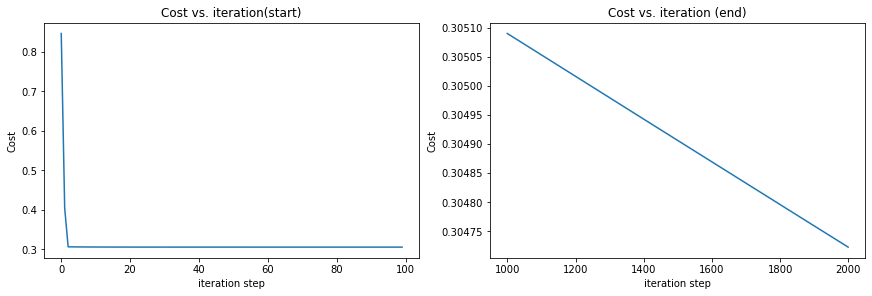

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

# 6. Inference

#### Decision Boundary

In [15]:
def plot_data(X, y, neg_label="y=0", pos_label="y=1"):
    negative = y == 0
    positive = y == 1
    
    # Plot examples
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    plt.plot(X[positive, 0], X[positive, 1], 'b+', label=pos_label)

    plt.ylabel('Exam 2 score') 
    plt.xlabel('Exam 1 score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
def plot_decision_boundary(model, X, y):
    """
    plot_decision_boundary - Binary Classification - (X,Y) Coordinates
    
    Arguments:
        model (func) : predictions model; y_hat = model(X)
        X : input data of shape (m, 2)
        y : labels 0,1 vector of shape (m,)
    Returns:
        Contour plotting
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    # Plot data
    plot_data(X, y, neg_label="Not admitted", pos_label="Admitted")
    plt.show()

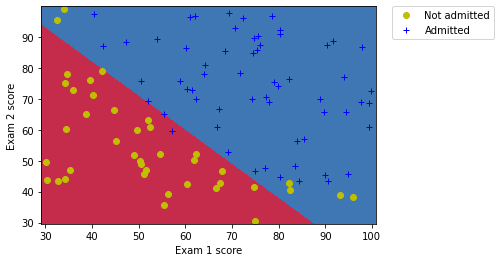

In [16]:
def predict(x, w, b):
    y_hat = f(x, w, b)
    predictions = (y_hat >= 0.5)
    return predictions

plot_decision_boundary(lambda x: predict(x, w_final, b_final), X_train, y_train)

#### Accuracy

In [17]:
y_hat = f(X_train, w_final, b_final)
accuracy = np.mean((y_hat >= 0.5) == y_train)
print(f'Train Accuracy: {accuracy:.2%}')

Train Accuracy: 92.00%


#### AUC

In [18]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y, y_pred)

    # auc
    print(f'auc score: {auc(fpr, tpr):.3f}')

    # plot
    plt.plot(fpr, tpr, linestyle='--', label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

auc score: 0.971


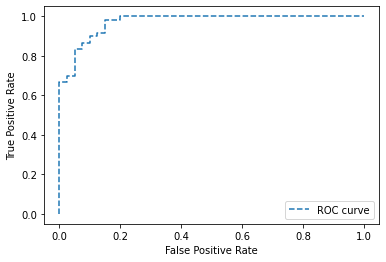

In [19]:
plot_ROC(y_train, y_hat)